# Statistical Physics - Paris Physics Master 2020-2021
## Home exercices
### Exercises by : Fabio Pietrucci & Julien Serreau
### Solution by:  David L. Paipa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.style.use('seaborn-white')

In [2]:
N_part = 2500 #particles
n_steps = 50 #max steps
a = 2
d = 4

# give next x step
def next_x():
    global a
    return np.random.uniform(-a,a)
# give next y step
def next_y():
    global a
    return np.random.uniform(-a,a)
# give next z step
def next_z():
    global a
    global d
    return d + np.random.uniform(-a,a)

# evolve N_part particles for n_steps steps in each dimension using the previous rules
positions = np.zeros([N_part,n_steps,3])
for n in range(1,n_steps): #for each timestep
    for i in range(N_part): #for each particle
        positions[i,n,0] = positions[i,n-1,0]+next_x()
        positions[i,n,1] = positions[i,n-1,1]+next_y()
        positions[i,n,2] = positions[i,n-1,2]+next_z()
        
#calculate distance from origin in each step
distance_matrix = np.zeros([N_part,n_steps])
for n in range(n_steps):
    for i in range(N_part):
        distance_matrix[i,n] = np.sqrt(positions[i,n,0]**2 + positions[i,n,1]**2 + positions[i,n,2]**2)

## MEAN DISPLACEMENT

13.166378571597166
13.333333333333334


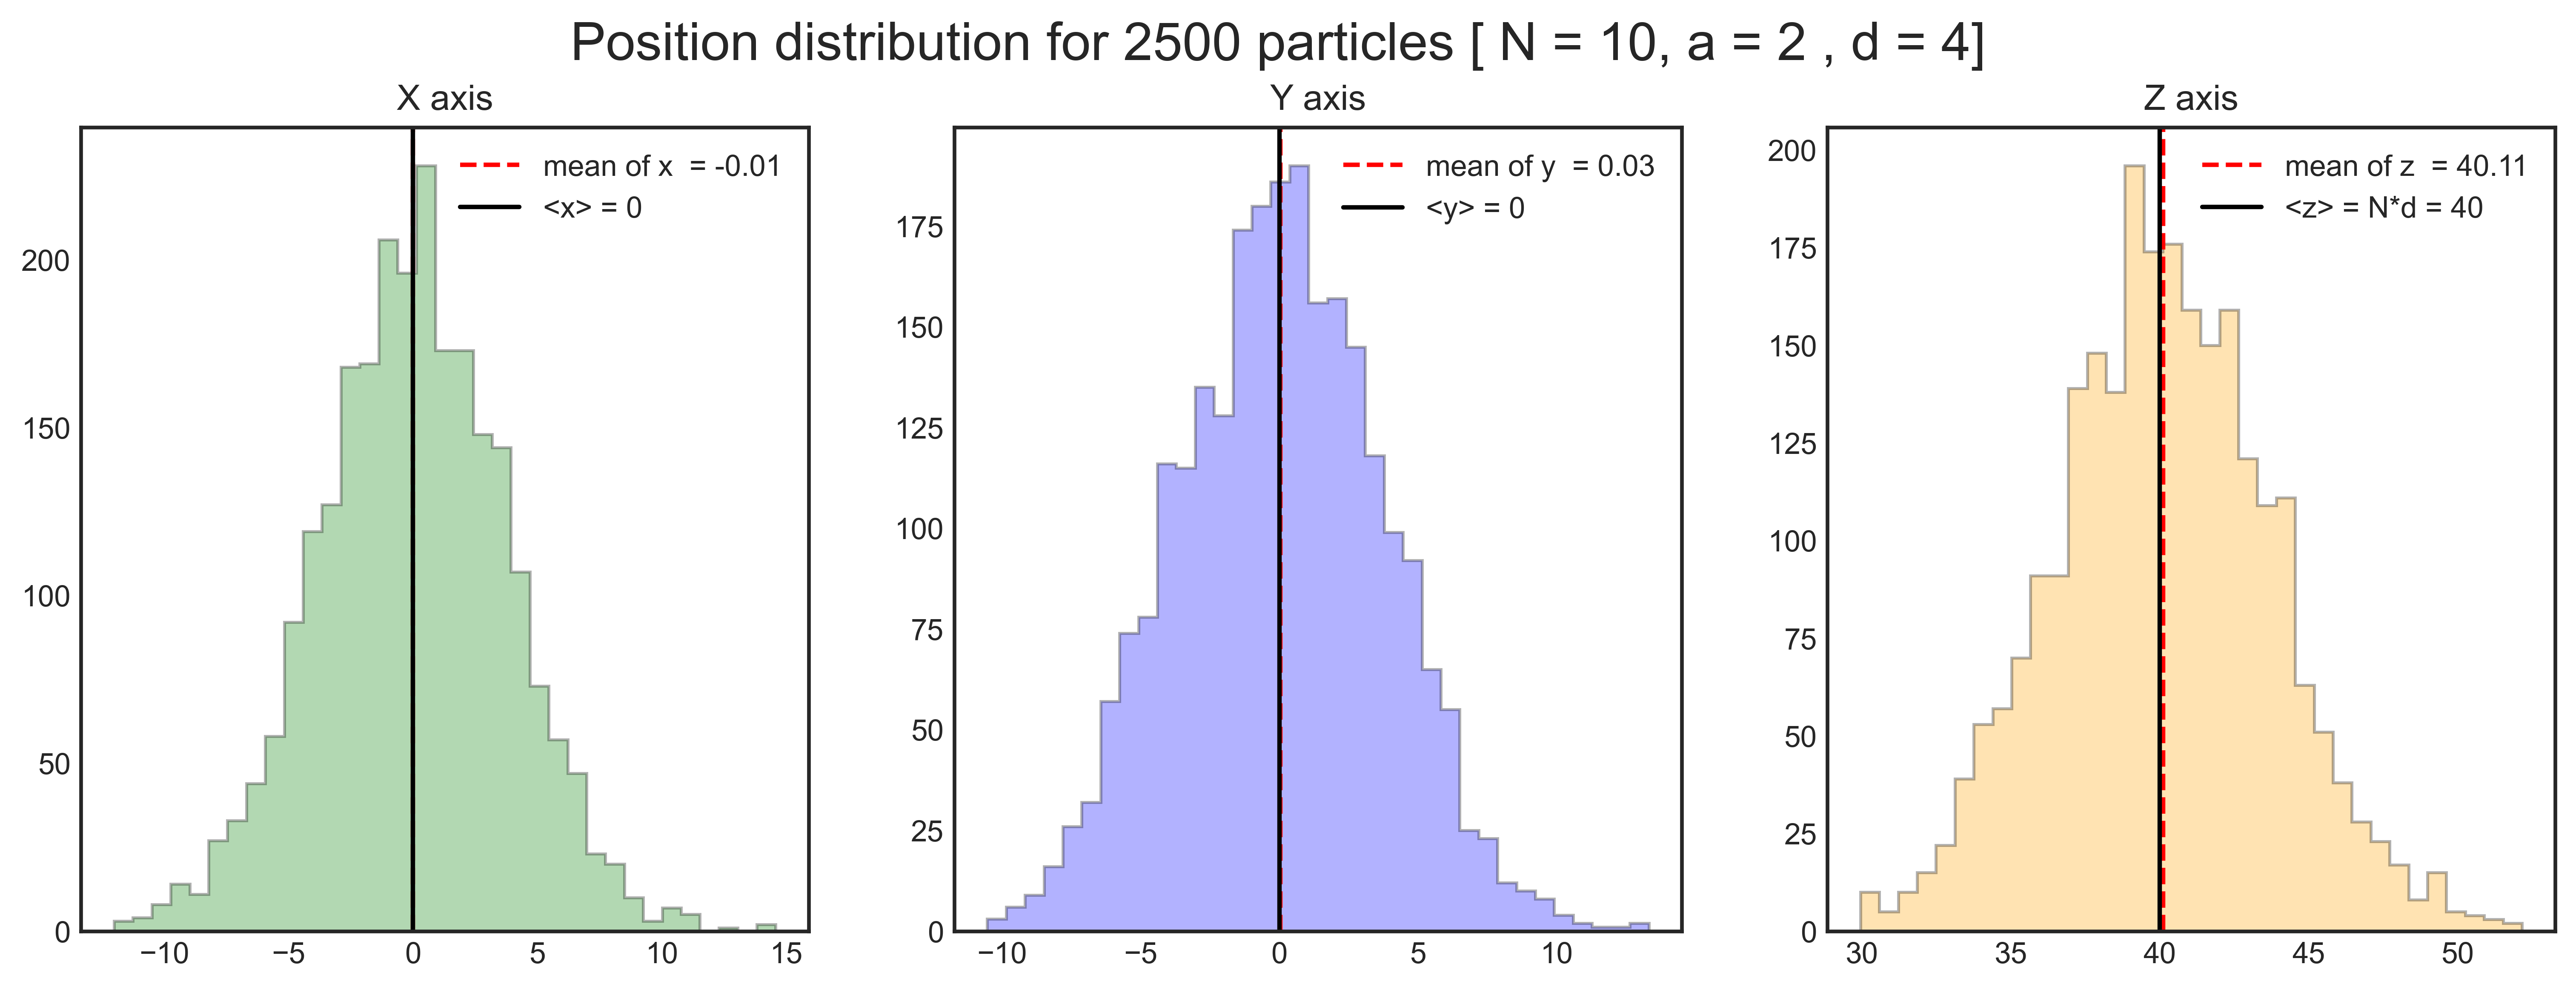

In [3]:
# get a specific dimension for a specific timestep
def get_n_time(n,x):
    return positions[:,n,x]
# get distance for a specific timestep
def get_d_time(n):
    return distance_matrix[:,n]


# plot for the timesptep N
N = 10

#plot hist kwargs
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=35, ec="k")


plt.figure(figsize=(15,5),dpi=500)

plt.suptitle("Position distribution for {} particles [ N = {}, a = {} , d = {}]".format(N_part,N,a,d),fontsize=18)

plt.subplot(1,3,1)
plt.title("X axis")
analyze = get_n_time(N,0)
mean_guess =  0
#print("mean guess x = {:.2f}".format(mean_guess))

plt.hist(analyze,**kwargs,facecolor="g")
plt.axvline(np.mean(analyze),c="r",linestyle="--",label="mean of x  = {:.2f}".format(np.mean(analyze)))
plt.axvline(mean_guess,c="k",label="<x> = {:.0f}".format(mean_guess))
#plt.axvline(N*(d**2))
plt.legend()


plt.subplot(1,3,2)
plt.title("Y axis")
analyze = get_n_time(N,1)
mean_guess =  0
#print("mean guess y = {:.2f}".format(mean_guess))

plt.hist(analyze,**kwargs,facecolor="b")
plt.axvline(np.mean(analyze),c="r",linestyle="--",label="mean of y  = {:.2f}".format(np.mean(analyze)))
plt.axvline(mean_guess,c="k",label="<y> = {:.0f}".format(mean_guess))
#plt.axvline(N*(d**2))
plt.legend()


plt.subplot(1,3,3)
plt.title("Z axis")
analyze = get_n_time(N,2)
mean_guess =  N*d
#print("mean guess z = {:.2f}".format(mean_guess))

plt.hist(analyze,**kwargs,facecolor="orange")
plt.axvline(np.mean(analyze),c="r",linestyle="--",label="mean of z  = {:.2f}".format(np.mean(analyze)))
plt.axvline(mean_guess,c="k",label="<z> = N*d = {:.0f}".format(mean_guess))
print(np.std(analyze)**2)
print(N*(a**2)/3)
#plt.axvline(N*(d**2))
plt.legend()

## MEAN SQUARED DISPLACEMENT

85555.46792060196
13.333333333333334


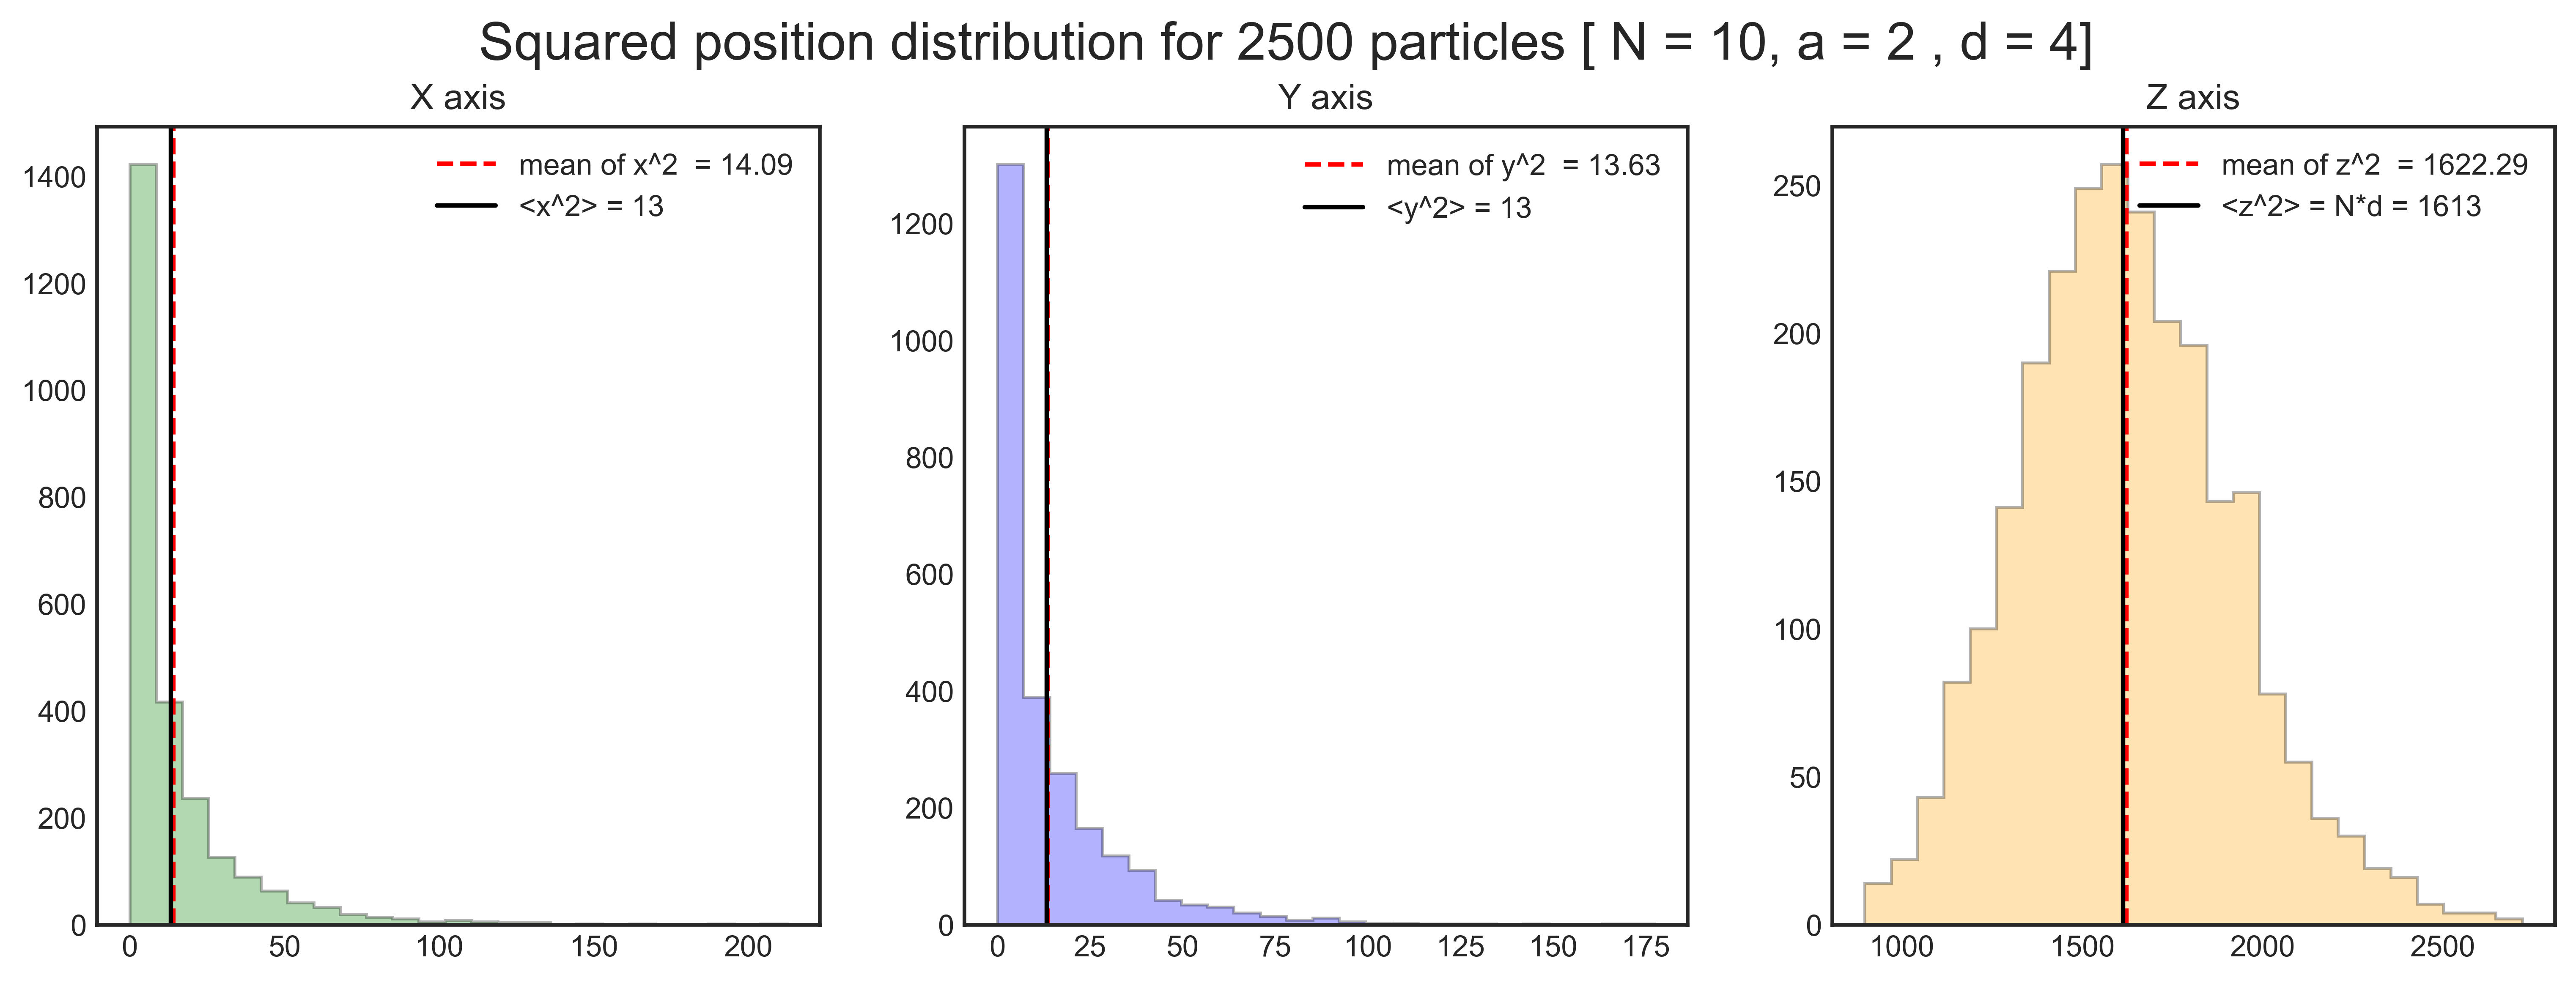

In [4]:


# plot for the timesptep N
N = 10

#plot hist kwargs
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=25, ec="k")


plt.figure(figsize=(15,5),dpi=500)

plt.suptitle("Squared position distribution for {} particles [ N = {}, a = {} , d = {}]".format(N_part,N,a,d),fontsize=18)

plt.subplot(1,3,1)
plt.title("X axis")
analyze = get_n_time(N,0)**2
mean_guess =  N*(a**2)/3
#print("mean guess x = {:.2f}".format(mean_guess))

plt.hist(analyze,**kwargs,facecolor="g")
plt.axvline(np.mean(analyze),c="r",linestyle="--",label="mean of x^2  = {:.2f}".format(np.mean(analyze)))
plt.axvline(mean_guess,c="k",label="<x^2> = {:.0f}".format(mean_guess))
#plt.axvline(N*(d**2))
plt.legend()


plt.subplot(1,3,2)
plt.title("Y axis")
analyze = get_n_time(N,1)**2
mean_guess =  N*(a**2)/3
#print("mean guess y = {:.2f}".format(mean_guess))

plt.hist(analyze,**kwargs,facecolor="b")
plt.axvline(np.mean(analyze),c="r",linestyle="--",label="mean of y^2  = {:.2f}".format(np.mean(analyze)))
plt.axvline(mean_guess,c="k",label="<y^2> = {:.0f}".format(mean_guess))
#plt.axvline(N*(d**2))
plt.legend()


plt.subplot(1,3,3)
plt.title("Z axis")
analyze = get_n_time(N,2)**2
mean_guess = N*(a**2)/3 + (N*d)**2 
#print("mean guess z = {:.2f}".format(mean_guess))

plt.hist(analyze,**kwargs,facecolor="orange")
plt.axvline(np.mean(analyze),c="r",linestyle="--",label="mean of z^2  = {:.2f}".format(np.mean(analyze)))
plt.axvline(mean_guess,c="k",label="<z^2> = N*d = {:.0f}".format(mean_guess))
print(np.std(analyze)**2)
print(N*(a**2)/3)
#plt.axvline(N*(d**2))
plt.legend()

## RMS DISPLACEMENT

0.0009620595219829148


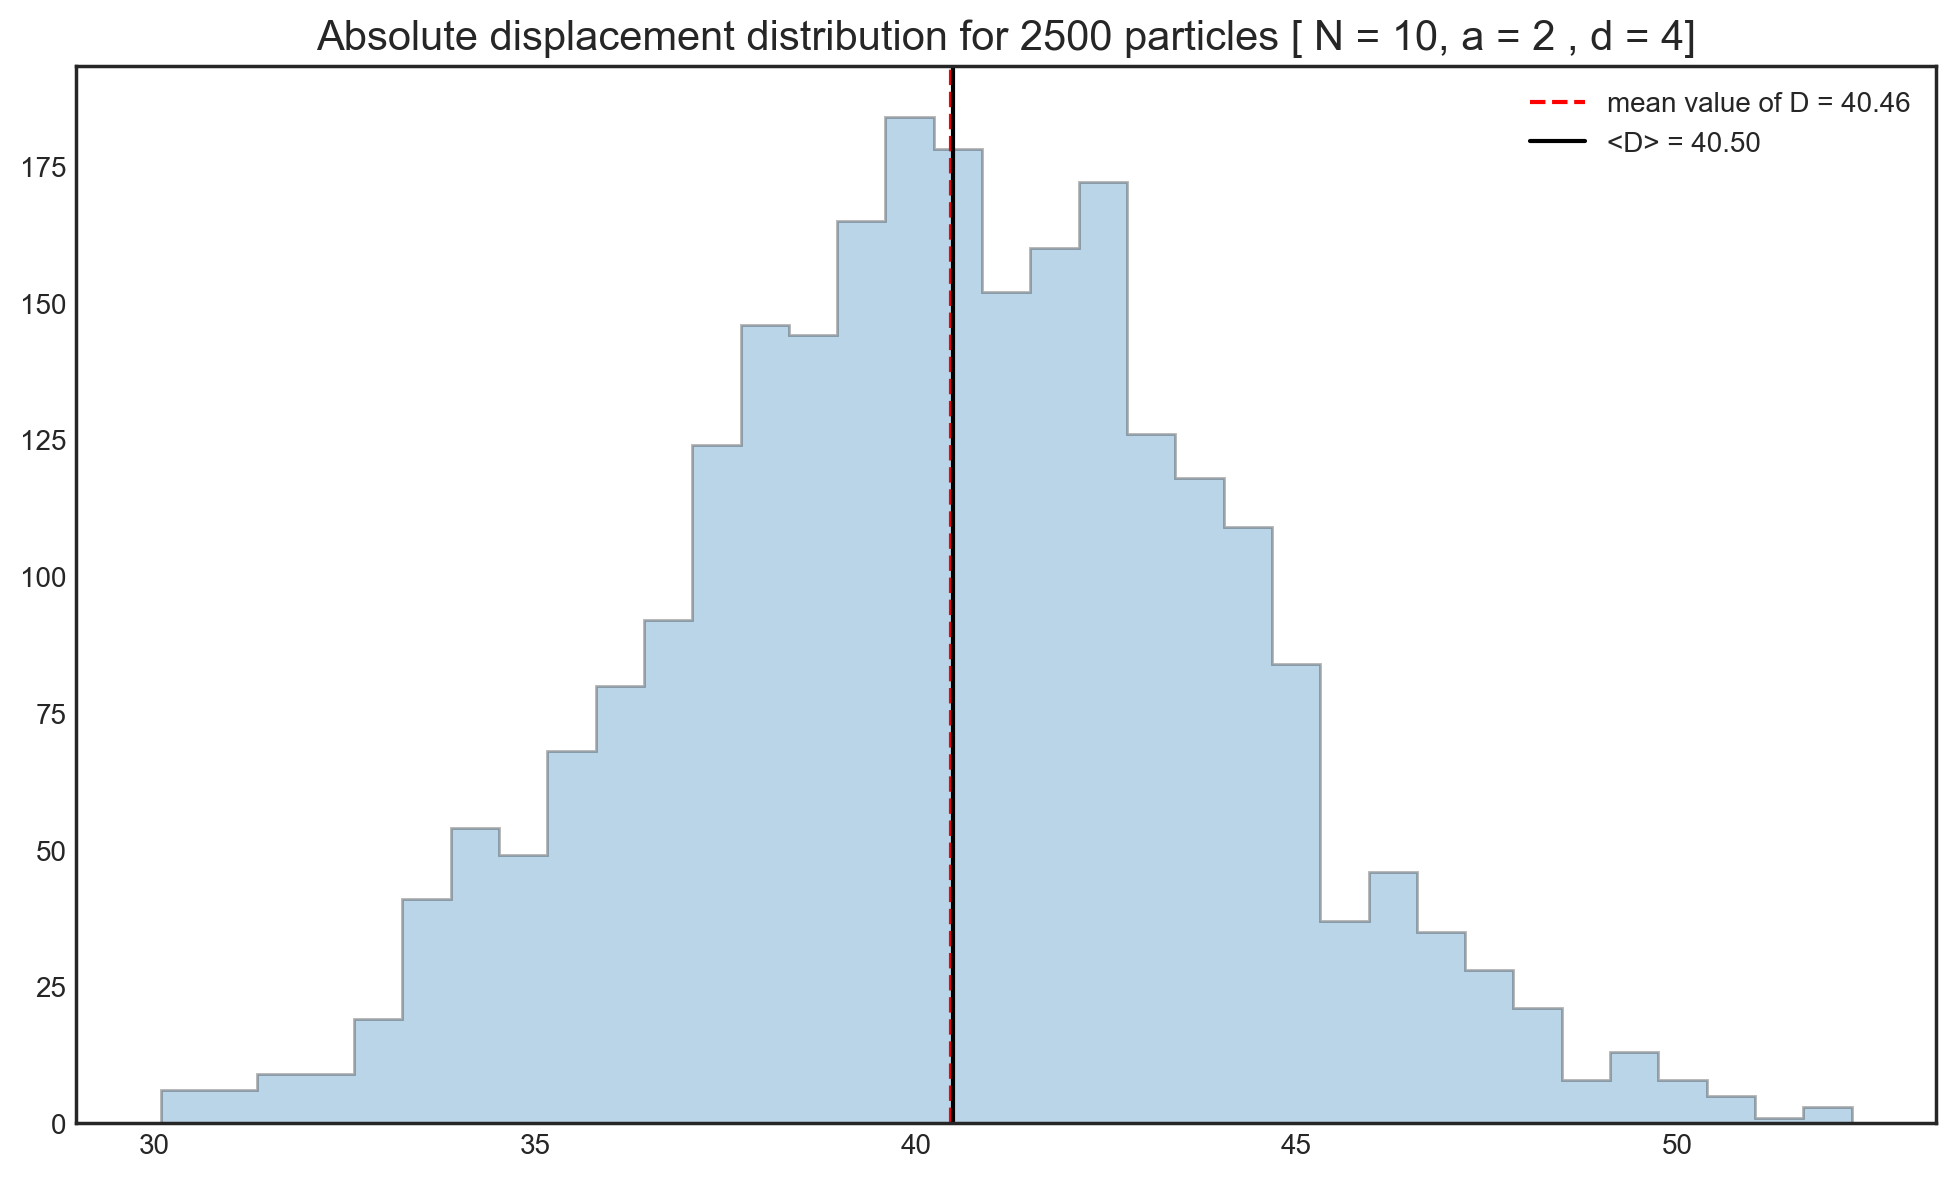

In [5]:
N = 10
values_plt = get_d_time(N)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=35, ec="k")

plt.figure(figsize=(12,7),dpi=200)
plt.title("Absolute displacement distribution for {} particles [ N = {}, a = {} , d = {}]".format(N_part,N,a,d),fontsize=15)
plt.hist(values_plt,**kwargs)
plt.axvline(np.mean(values_plt),c="r",linestyle="--",label = "mean value of D = {:.2f}".format(np.mean(values_plt)))
guess  = np.sqrt((N*d)**2 + N*(a**2))
print(np.abs(guess-np.mean(values_plt))/np.mean(values_plt))
plt.axvline(guess,c="k",label="<D> = {:.2f}".format(guess))
plt.legend()

## Random walk plot

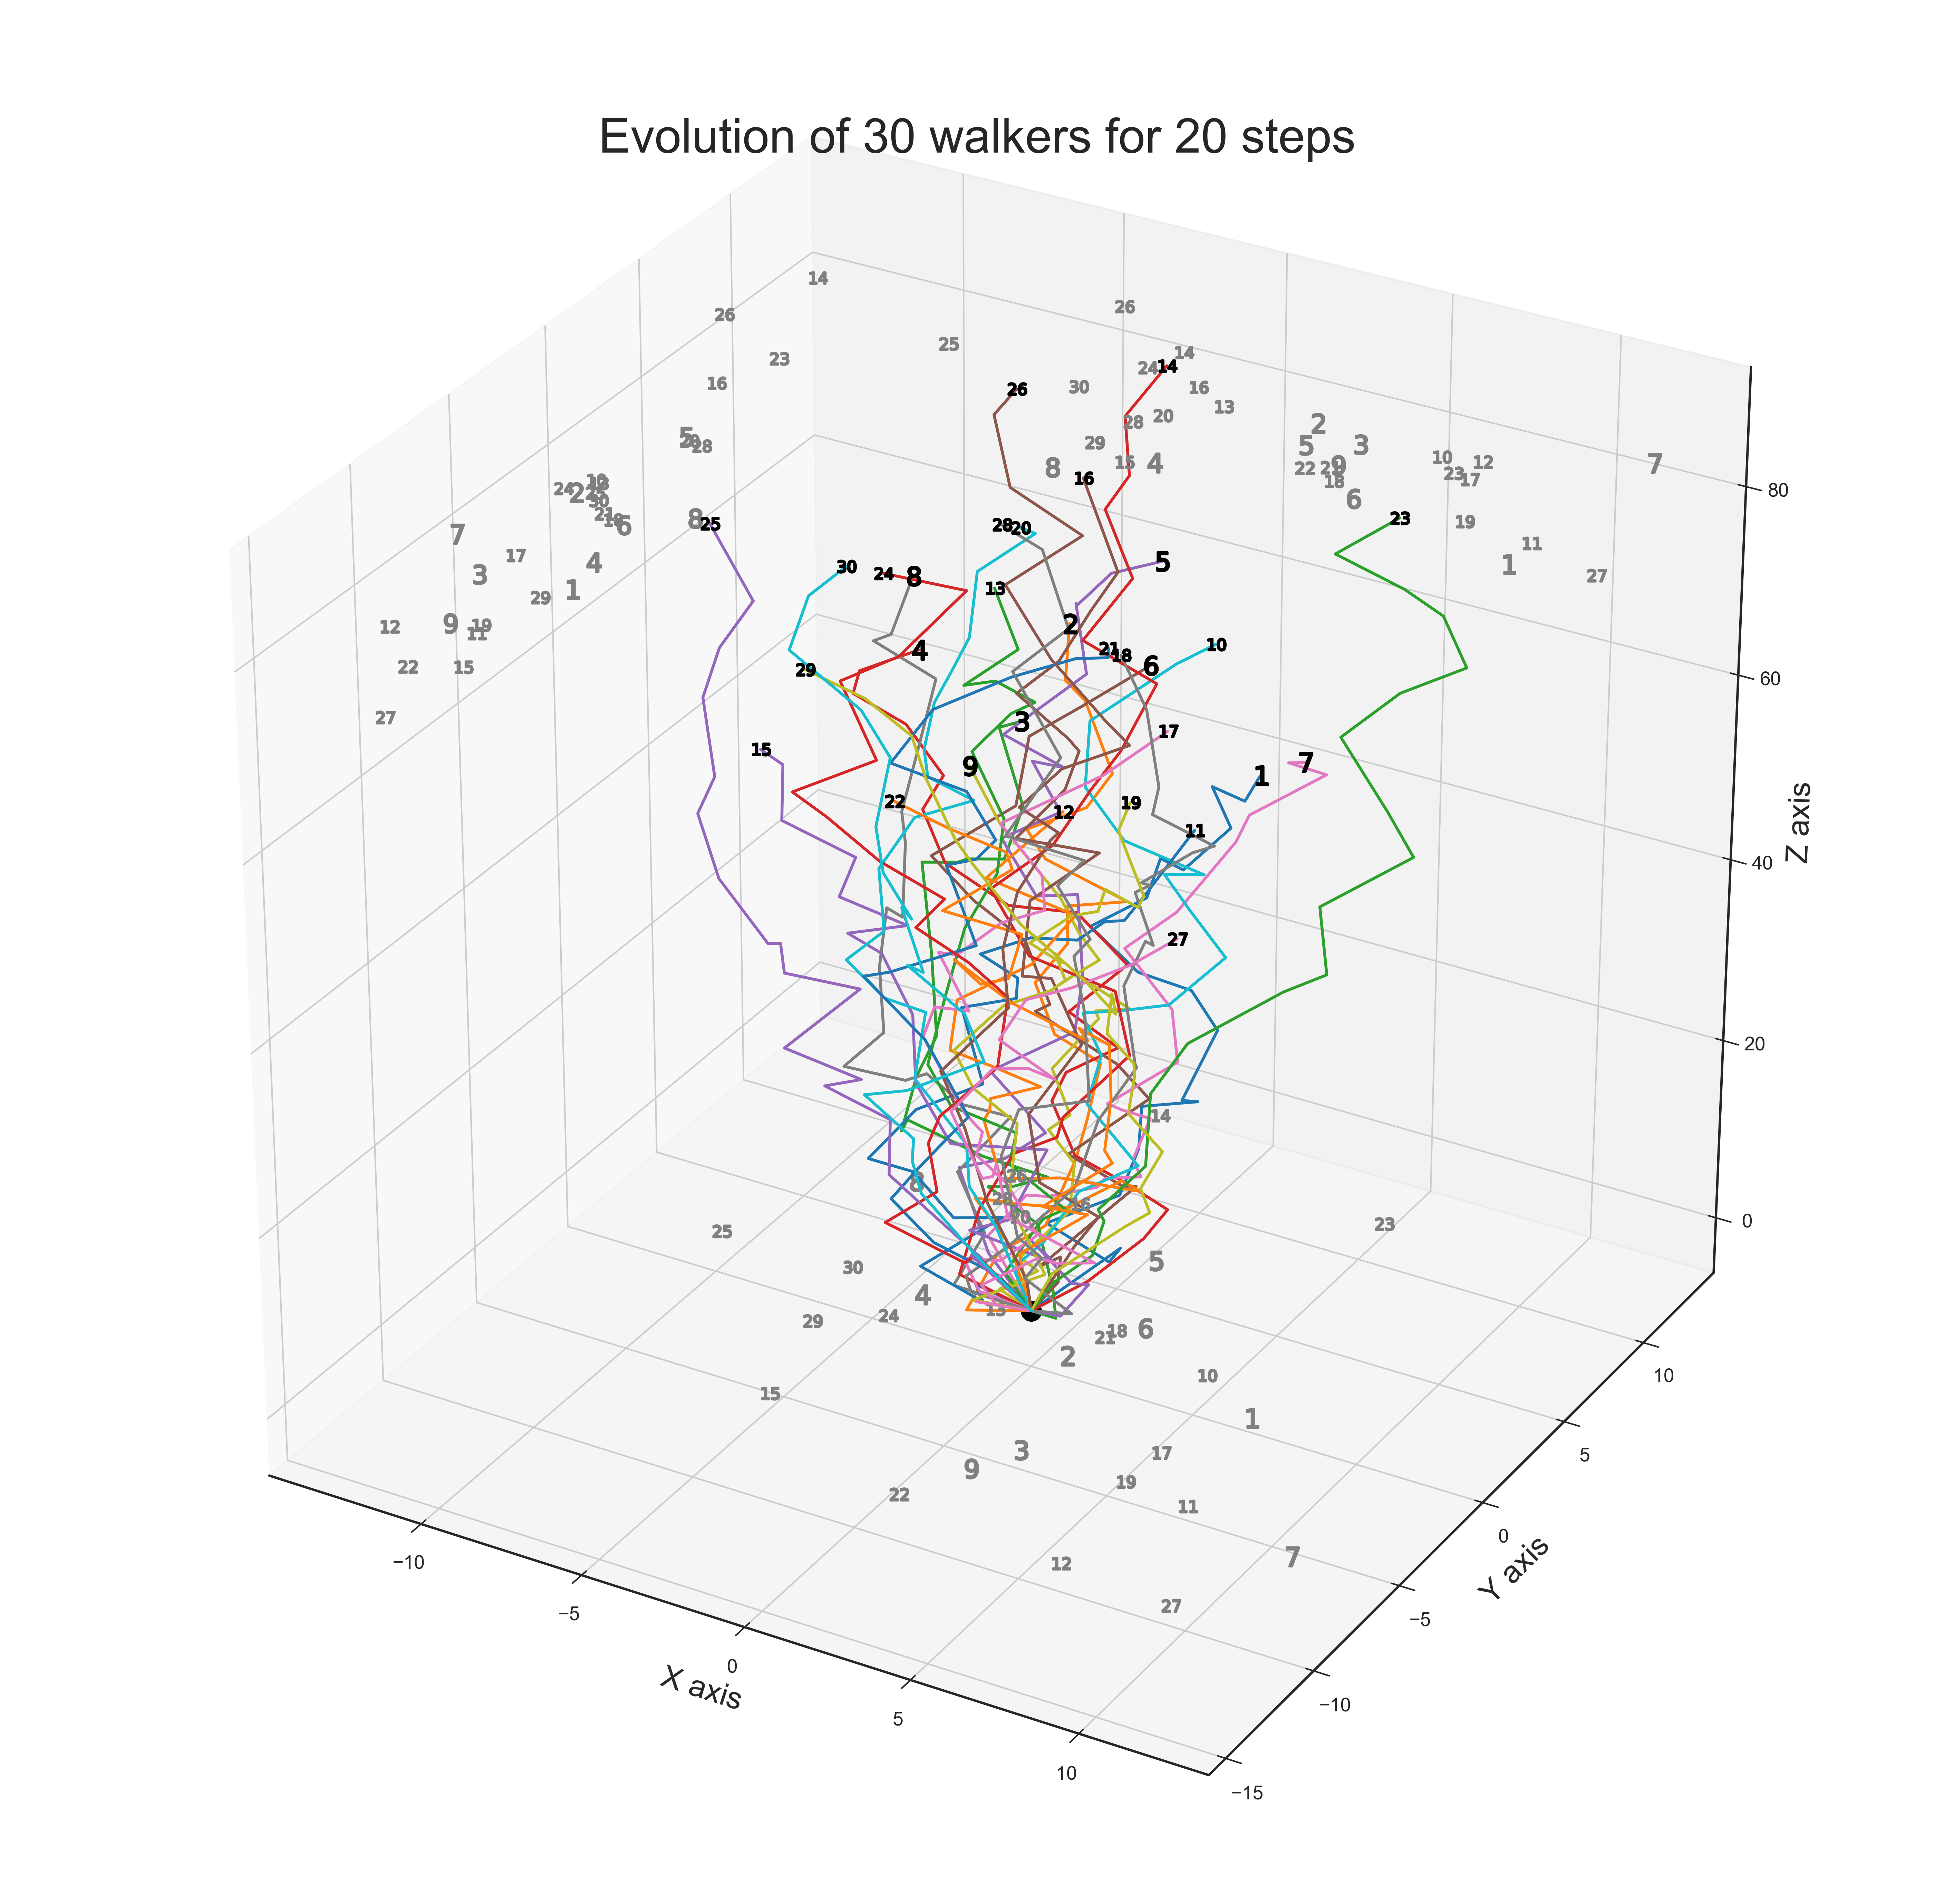

In [6]:
def plot_n_walks(n_walks,N_steps,pos):
    pos_plot = pos[:n_walks,:N_steps,:]
    
    fig = plt.figure(figsize=(18,18),dpi=400)
    
    ax = plt.axes(projection="3d")
    ax.set_title("Evolution of {} walkers for {} steps".format(n_walks,N_steps),fontsize=25)
    maxy = np.max(pos_plot[:,-1,1])
    maxx = np.max(pos_plot[:,-1,0])
    for i in range(n_walks):
        ax.plot(pos_plot[i,:,0],pos_plot[i,:,1],pos_plot[i,:,2])
        ax.scatter(pos_plot[i,-1:,0],pos_plot[i,-1:,1],pos_plot[i,-1:,2],c="k",s=100,marker="${}$".format(i+1))
        
        
        ax.plot(pos_plot[i,-1:,0], pos_plot[i,-1:,1],"grey",marker="${}$".format(i+1),markersize=10, zdir='z', zs=0)
        ax.plot(pos_plot[i,-1:,0], pos_plot[i,-1:,2],"grey",marker="${}$".format(i+1),markersize=10, zdir='y', zs=maxy+1)
        ax.plot(pos_plot[i,-1:,1], pos_plot[i,-1:,2],"grey",marker="${}$".format(i+1),markersize=10, zdir='x', zs=-maxx-1)

    ax.scatter([0],[0],[0],marker="o", s=100,c="k")
    ax.set_xlabel("X axis",fontsize=16)
    ax.set_ylabel("Y axis",fontsize=16)
    ax.set_zlabel("Z axis",fontsize=16)
    
    #ax.set_xlim([-0.5, 1.5])
    #ax.set_ylim([-maxy, maxy])
    #ax.set_zlim([-1.5, 1.5])
    plt.show()
    

plot_n_walks(30,20,positions)    

    

## Sketch of arbitrary Free energy function F(Q)

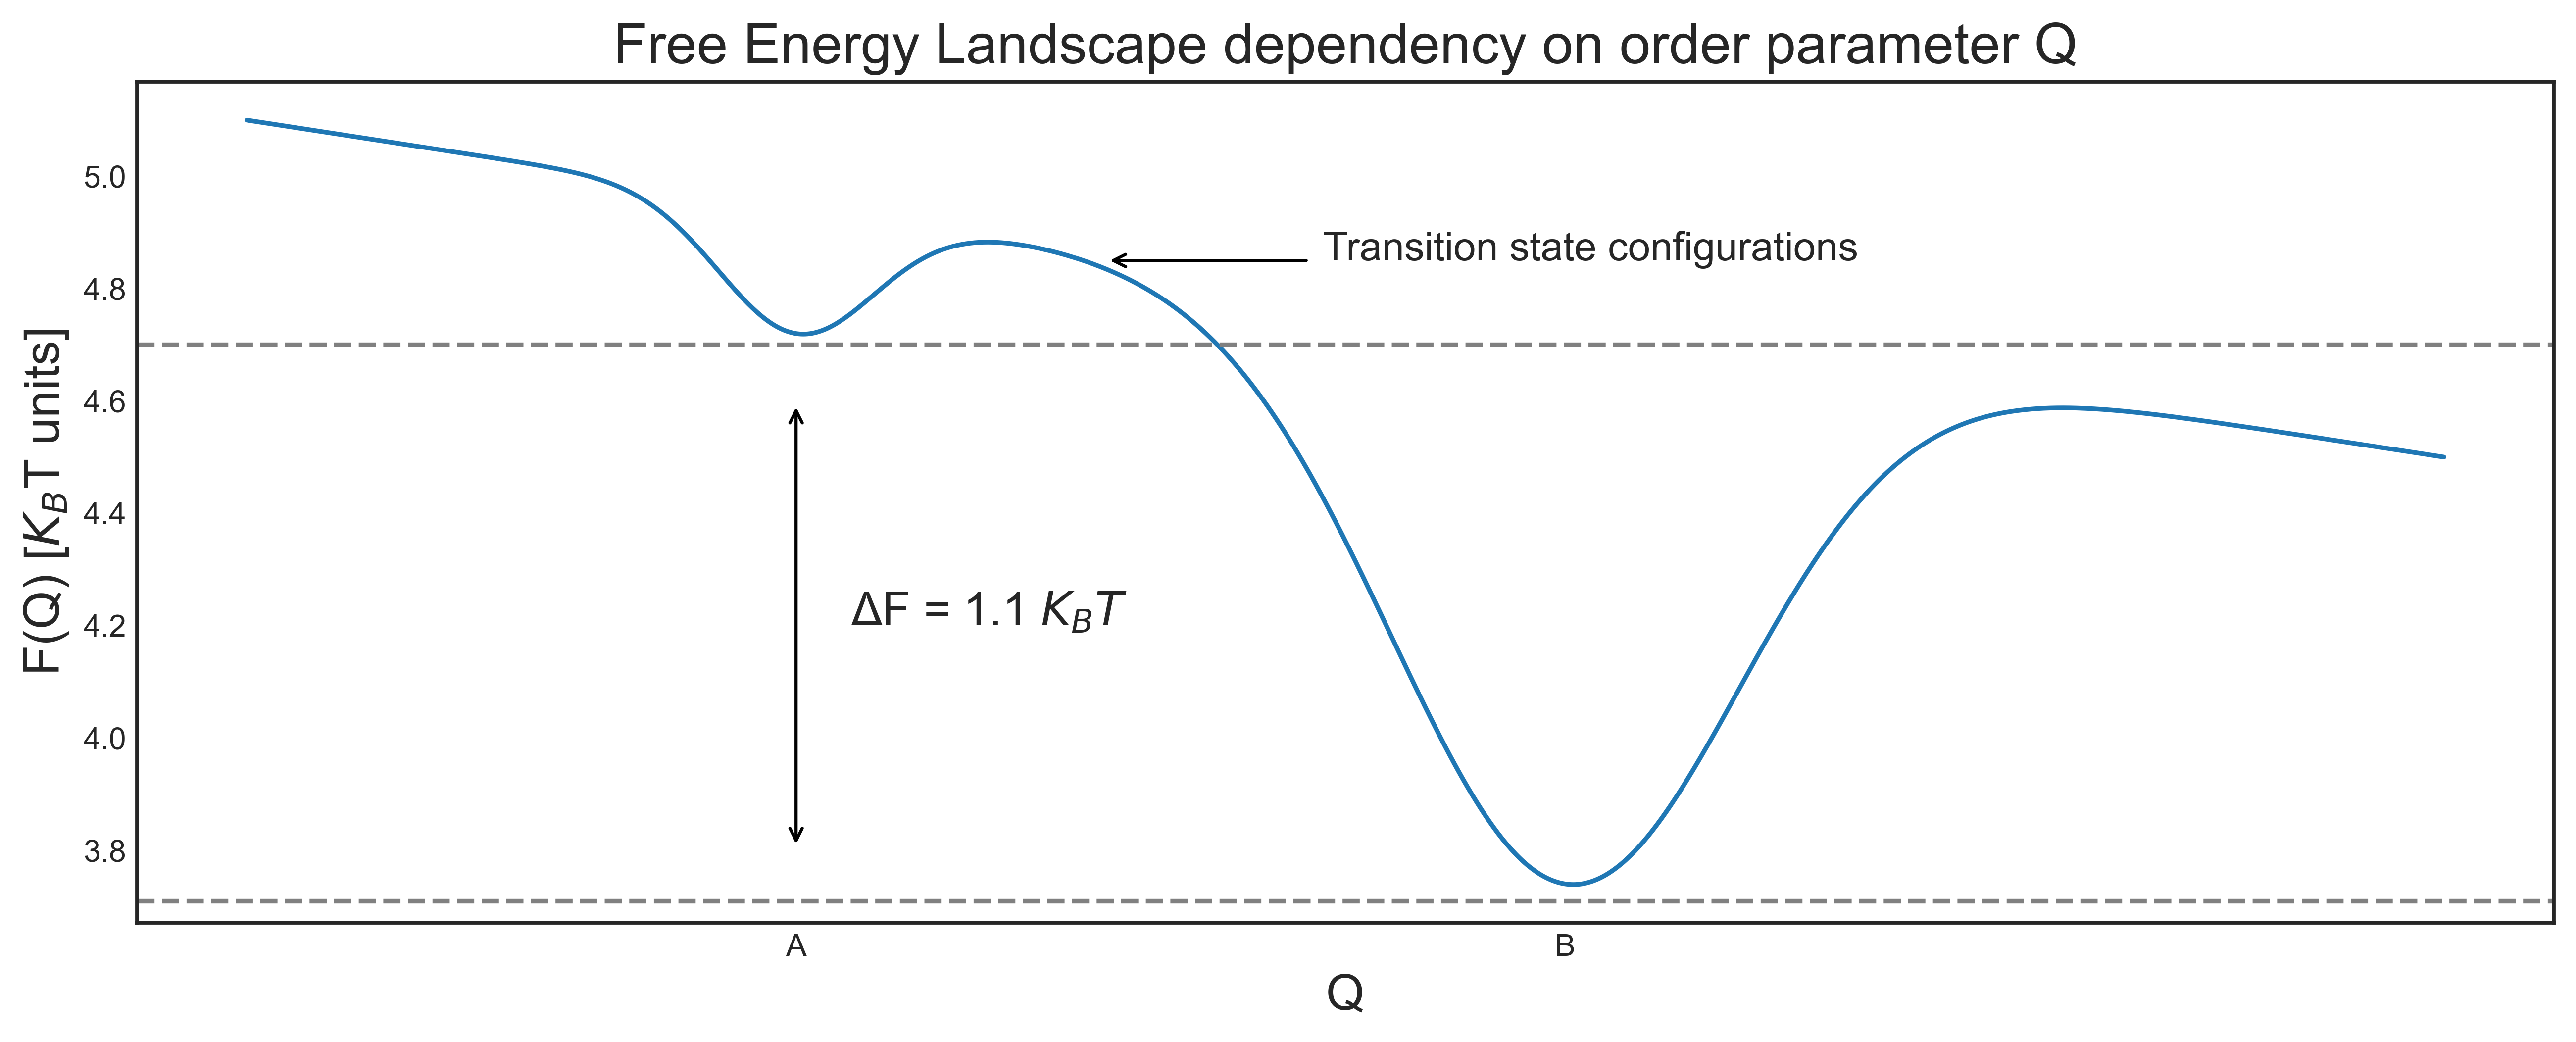

In [74]:
Q = np.linspace(0,20,1000)
def F_parametrized(q,m=-0.03,c1=5,c2=12,b=5.1):
    g1 = -0.23*np.exp(-(q-c1)**2)
    g2 = -np.exp(-0.2*(q-c2)**2)
    return b + g1+g2 +m*q
F = F_parametrized(Q)

plt.figure(figsize=(14,5),dpi=450)
plt.title("Free Energy Landscape dependency on order parameter Q",fontsize=18)
plt.plot(Q,F)
plt.text(5.5,4.2,"ΔF = 1.1 $K_B T$ ",fontsize=15)
plt.text(9.8,4.85,"Transition state configurations",fontsize=13)
plt.axhline(4.7,linestyle="--",c="grey")
plt.axhline(3.71,linestyle="--",c="grey")
plt.xlabel("Q",fontsize=16)
plt.ylabel("F(Q) [$K_B$T units]",fontsize=16)
plt.xticks([5,12],("A","B"))
_=plt.annotate(s='', xy=(5,4.6), xytext=(5,3.8), arrowprops=dict(arrowstyle='<->'))
_=plt.annotate(s='', xy=(7.8,4.85), xytext=(9.7,4.85), arrowprops=dict(arrowstyle='->'))



## POLARIZATION

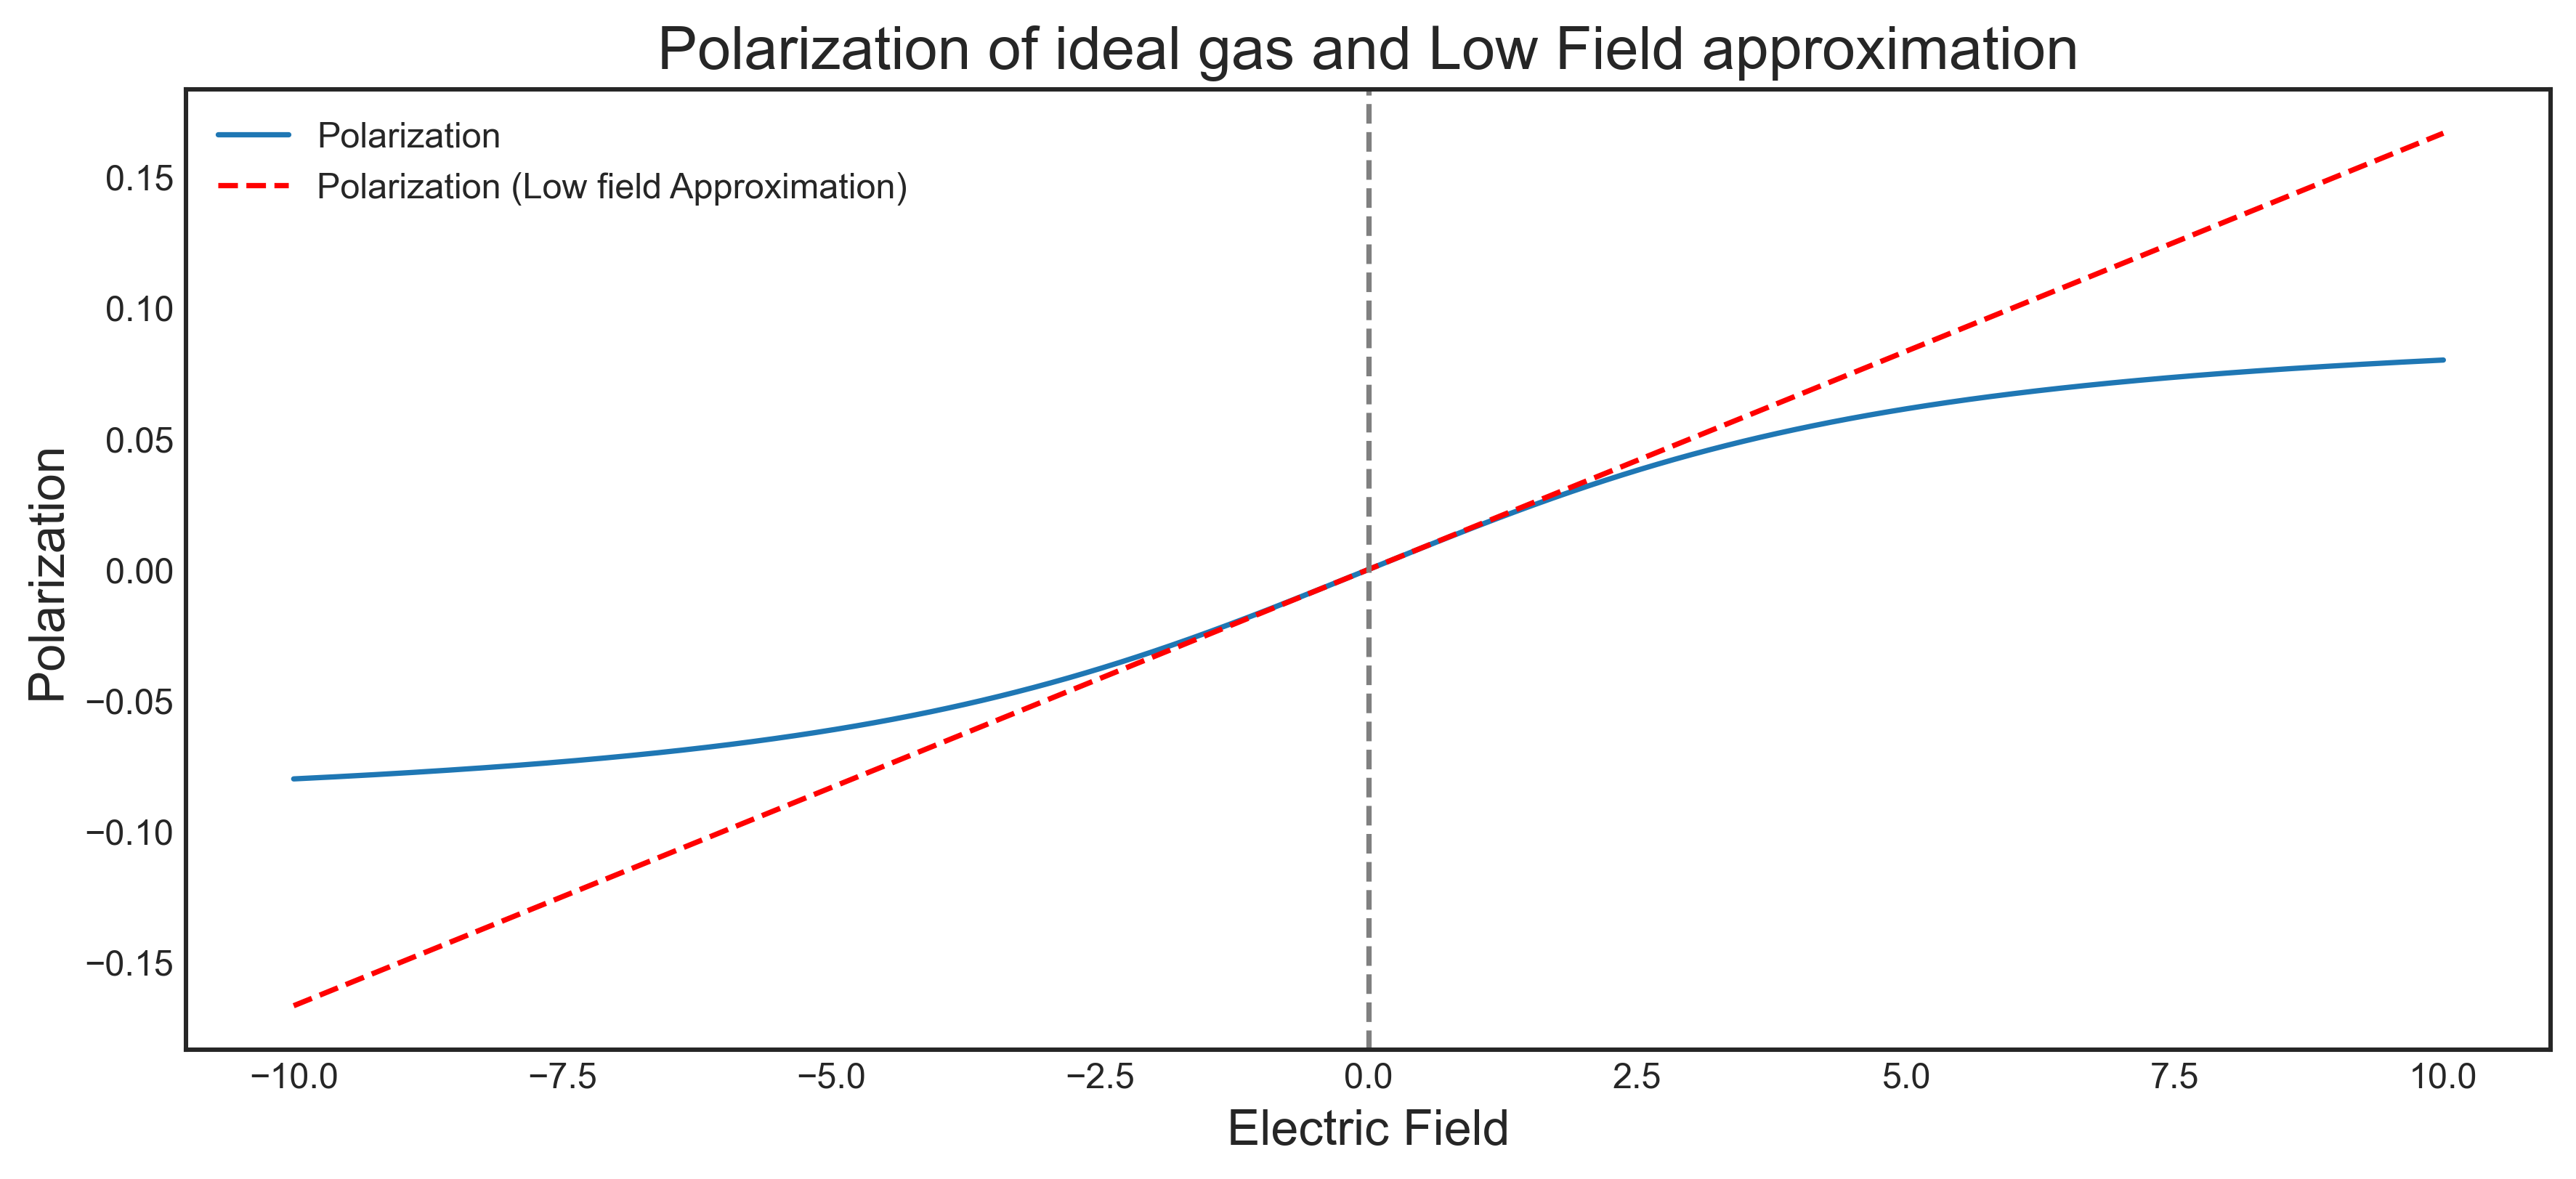

In [101]:
def polarizability(e,b=5,p=0.1):
    return -(1/(b*e)) + (p/(np.tanh(b*p*e)))

def low_field(e,b=5,p=0.1):
    return b*p*p*e/3


E = np.linspace(-10,10,1500)
P = polarizability(E)
LFP = low_field(E)

plt.figure(figsize=(12,5),dpi=350)
plt.title("Polarization of ideal gas and Low Field approximation",fontsize=17)
plt.plot(E,P,label="Polarization")
plt.plot(E,LFP,c="r",linestyle="--",label="Polarization (Low field Approximation)")
plt.xlabel("Electric Field",fontsize=14)
plt.ylabel("Polarization",fontsize=14)
plt.axvline(0,c="grey",linestyle="--")
plt.legend()